In [59]:
import pandas as pd

df = pd.read_csv("D:\Greaduation Project\data\kaggle\Stroke Prediction Dataset.csv")


Load Data

In [60]:
df.head()

,Sex,BMI,Smoking,AlcoholDrinking,HeartDisease,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,Stroke
0,Female,16.60,Yes,No,No,3,30,No,Yes,55-59,White,Yes,Very good,5,Yes,No,No
1,Female,20.34,No,No,No,0,0,No,No,80 or older,White,Yes,Very good,7,No,No,Yes
2,Male,26.58,Yes,No,No,20,30,No,Yes,65-69,White,Yes,Fair,8,Yes,No,No
3,Female,24.21,No,No,No,0,0,No,No,75-79,White,No,Good,6,No,No,No
4,Female,23.71,No,No,No,28,0,Yes,No,40-44,White,Yes,Very good,8,No,No,No


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sex               319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   HeartDisease      319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Diabetic          319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  PhysicalActivity  319795 non-null  object 
 12  GenHealth         319795 non-null  object 
 13  SleepTime         319795 non-null  int64  
 14  Asthma            319795 non-null  object 
 15  KidneyDisease     319795 non-null  object 
 16  Stroke            31

In [62]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [63]:
df.isna().sum()

Sex                 0
BMI                 0
Smoking             0
AlcoholDrinking     0
HeartDisease        0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Diabetic            0
AgeCategory         0
Race                0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
Stroke              0
dtype: int64

Missing Values

In [64]:
df.isna().sum()

Sex                 0
BMI                 0
Smoking             0
AlcoholDrinking     0
HeartDisease        0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Diabetic            0
AgeCategory         0
Race                0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
Stroke              0
dtype: int64

outliers

In [65]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
numeric_cols

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

In [66]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(col, len(outliers))

BMI 10396
PhysicalHealth 47146
MentalHealth 51576
SleepTime 4543


In [67]:
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df[(df[col] < lower) | (df[col] > upper)]

,Sex,BMI,Smoking,AlcoholDrinking,HeartDisease,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,Stroke
5,Female,28.87,Yes,No,Yes,6,0,Yes,No,75-79,Black,No,Fair,12,No,No,No
10,Male,34.30,Yes,No,Yes,30,0,Yes,Yes,60-64,White,No,Poor,15,Yes,No,No
50,Female,26.61,No,No,No,0,0,No,No,65-69,White,Yes,Good,12,Yes,No,No
206,Female,35.11,Yes,No,No,20,0,No,No,75-79,Black,Yes,Fair,12,No,No,No
235,Male,43.54,No,No,No,0,0,Yes,Yes,45-49,Black,Yes,Fair,2,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319373,Female,24.03,No,No,No,12,7,Yes,Yes,50-54,Hispanic,No,Fair,2,No,No,No
319394,Male,33.13,No,No,No,0,0,No,No,55-59,Hispanic,Yes,Fair,2,No,Yes,No
319408,Female,38.86,No,No,No,30,30,Yes,No,45-49,Hispanic,No,Fair,1,No,No,No
319702,Male,24.41,No,Yes,No,0,0,No,No,35-39,Hispanic,Yes,Good,12,No,No,No


In [68]:
# bmi capping
Q1 = df["BMI"].quantile(0.25)
Q3 = df["BMI"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df["BMI"] = df["BMI"].clip(lower, upper)

In [69]:
df["SleepTime"].describe()

count    319795.000000
mean          7.097075
std           1.436007
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          24.000000
Name: SleepTime, dtype: float64

In [70]:
#Target Distribution
df["Stroke"].value_counts()
df["Stroke"].value_counts(normalize=True)

Stroke
No     0.96226
Yes    0.03774
Name: proportion, dtype: float64

Smoking vs Stroke

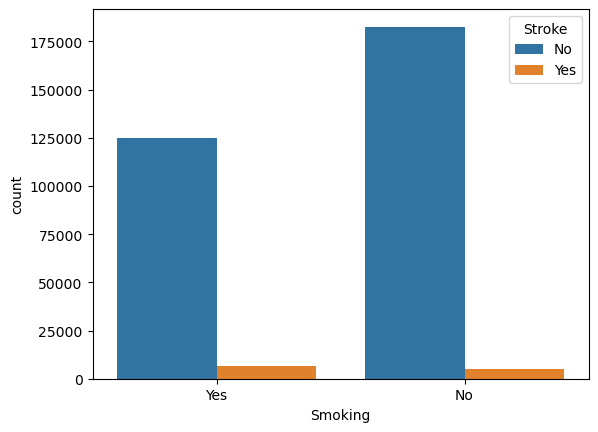

Stroke,No,Yes
Smoking,,
No,0.972036,0.027964
Yes,0.948335,0.051665


In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Smoking", hue="Stroke", data=df)
plt.show()

pd.crosstab(df["Smoking"], df["Stroke"], normalize="index")

HeartDisease vs Stroke

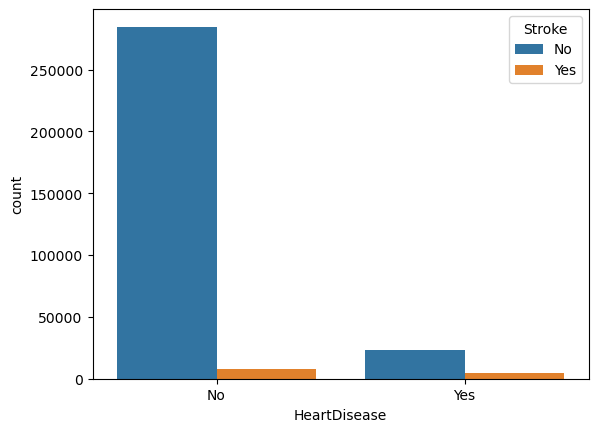

Stroke,No,Yes
HeartDisease,,
No,0.973737,0.026263
Yes,0.839660,0.160340


In [72]:
sns.countplot(x="HeartDisease", hue="Stroke", data=df)
plt.show()

pd.crosstab(df["HeartDisease"], df["Stroke"], normalize="index")

Diabetic vs Stroke

In [73]:
pd.crosstab(df["Diabetic"], df["Stroke"], normalize="index")

Stroke,No,Yes
Diabetic,,
No,0.970707,0.029293
"No, borderline diabetes",0.947795,0.052205
Yes,0.908240,0.091760
Yes (during pregnancy),0.971864,0.028136


AgeCategory vs Stroke

In [74]:
pd.crosstab(df["AgeCategory"], df["Stroke"], normalize="index")

Stroke,No,Yes
AgeCategory,,
18-24,0.997104,0.002896
25-29,0.994692,0.005308
30-34,0.993014,0.006986
35-39,0.990608,0.009392
40-44,0.986052,0.013948
45-49,0.980359,0.019641
50-54,0.973012,0.026988
55-59,0.963000,0.037000
60-64,0.955976,0.044024


GenHealth vs Stroke

In [75]:
pd.crosstab(df["GenHealth"], df["Stroke"], normalize="index")

Stroke,No,Yes
GenHealth,,
Excellent,0.989662,0.010338
Fair,0.904894,0.095106
Good,0.958348,0.041652
Poor,0.829126,0.170874
Very good,0.980045,0.019955


In [76]:
# age numeric
age_map = {
    "18-24": 1,
    "25-29": 2,
    "30-34": 3,
    "35-39": 4,
    "40-44": 5,
    "45-49": 6,
    "50-54": 7,
    "55-59": 8,
    "60-64": 9,
    "65-69": 10,
    "70-74": 11,
    "75-79": 12,
    "80 or older": 13
}
df["AgeNum"] = df["AgeCategory"].map(age_map)

# diabetic flag
df["is_diabetic"] = df["Diabetic"].isin(
    ["Yes", "No, borderline diabetes"]
).astype(int)

# health flag
df["bad_health"] = df["GenHealth"].isin(
    ["Poor", "Fair"]
).astype(int)

# risk score
df["risk_score"] = (
    df["HeartDisease"].map({"Yes":1,"No":0}) +
    df["is_diabetic"] +
    df["bad_health"]
)

In [77]:
df.columns

Index(['Sex', 'BMI', 'Smoking', 'AlcoholDrinking', 'HeartDisease',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Diabetic',
       'AgeCategory', 'Race', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'Stroke', 'AgeNum', 'is_diabetic',
       'bad_health', 'risk_score'],
      dtype='object')

In [78]:
df = df.drop("AgeCategory", axis=1)
df = df.drop("Diabetic", axis=1)
df = df.drop("GenHealth", axis=1)

Encoding

In [79]:
df = pd.get_dummies(df, drop_first=True)

In [80]:
df.shape
df.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,AgeNum,is_diabetic,bad_health,risk_score,Sex_Male,Smoking_Yes,...,DiffWalking_Yes,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,Stroke_Yes
0,16.60,3,30,5,8,1,0,1,False,True,...,False,False,False,False,False,True,True,True,False,False
1,20.34,0,0,7,13,0,0,0,False,False,...,False,False,False,False,False,True,True,False,False,True
2,26.58,20,30,8,10,1,1,2,True,True,...,False,False,False,False,False,True,True,True,False,False
3,24.21,0,0,6,12,0,0,0,False,False,...,False,False,False,False,False,True,False,False,False,False
4,23.71,28,0,8,5,0,0,0,False,False,...,True,False,False,False,False,True,True,False,False,False


Split

In [81]:
from sklearn.model_selection import train_test_split

X = df.drop("Stroke_Yes", axis=1)
y = df["Stroke_Yes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight="balanced", max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [84]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[47182 14363]
 [  667  1747]]
              precision    recall  f1-score   support

       False       0.99      0.77      0.86     61545
        True       0.11      0.72      0.19      2414

    accuracy                           0.77     63959
   macro avg       0.55      0.75      0.53     63959
weighted avg       0.95      0.77      0.84     63959



In [85]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    class_weight="balanced",
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[61028   517]
 [ 2385    29]]
              precision    recall  f1-score   support

       False       0.96      0.99      0.98     61545
        True       0.05      0.01      0.02      2414

    accuracy                           0.95     63959
   macro avg       0.51      0.50      0.50     63959
weighted avg       0.93      0.95      0.94     63959



SMOTE

In [86]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print(y_train_sm.value_counts())

Stroke_Yes
False    246181
True     246181
Name: count, dtype: int64


In [87]:
rf_sm = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_sm.fit(X_train_sm, y_train_sm)

y_pred = rf.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[61028   517]
 [ 2385    29]]
              precision    recall  f1-score   support

       False       0.96      0.99      0.98     61545
        True       0.05      0.01      0.02      2414

    accuracy                           0.95     63959
   macro avg       0.51      0.50      0.50     63959
weighted avg       0.93      0.95      0.94     63959



threshold

In [88]:
y_probs = rf.predict_proba(X_test)[:,1]

In [89]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

for t in [0.1, 0.2, 0.3, 0.4, 0.5]:
    print("\nThreshold =", t)
    y_pred_t = (y_probs >= t).astype(int)
    print(confusion_matrix(y_test, y_pred_t))
    print(classification_report(y_test, y_pred_t))


Threshold = 0.1
[[54792  6753]
 [ 1405  1009]]
              precision    recall  f1-score   support

       False       0.97      0.89      0.93     61545
        True       0.13      0.42      0.20      2414

    accuracy                           0.87     63959
   macro avg       0.55      0.65      0.56     63959
weighted avg       0.94      0.87      0.90     63959


Threshold = 0.2
[[58834  2711]
 [ 1944   470]]
              precision    recall  f1-score   support

       False       0.97      0.96      0.96     61545
        True       0.15      0.19      0.17      2414

    accuracy                           0.93     63959
   macro avg       0.56      0.58      0.56     63959
weighted avg       0.94      0.93      0.93     63959


Threshold = 0.3
[[60184  1361]
 [ 2223   191]]
              precision    recall  f1-score   support

       False       0.96      0.98      0.97     61545
        True       0.12      0.08      0.10      2414

    accuracy                          

In [100]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    eval_metric="logloss"
)

xgb_model.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, ...)

In [101]:
y_pred = xgb_model.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[51985  9560]
 [ 1283  1131]]
              precision    recall  f1-score   support

       False       0.98      0.84      0.91     61545
        True       0.11      0.47      0.17      2414

    accuracy                           0.83     63959
   macro avg       0.54      0.66      0.54     63959
weighted avg       0.94      0.83      0.88     63959



In [102]:
y_probs = xgb_model.predict_proba(X_test)[:,1]

from sklearn.metrics import confusion_matrix, classification_report

for t in [0.1, 0.2, 0.3, 0.4, 0.5]:
    print("\nThreshold =", t)
    y_pred_t = (y_probs >= t).astype(int)
    print(confusion_matrix(y_test, y_pred_t))
    print(classification_report(y_test, y_pred_t))


Threshold = 0.1
[[24757 36788]
 [  246  2168]]
              precision    recall  f1-score   support

       False       0.99      0.40      0.57     61545
        True       0.06      0.90      0.10      2414

    accuracy                           0.42     63959
   macro avg       0.52      0.65      0.34     63959
weighted avg       0.95      0.42      0.55     63959


Threshold = 0.2
[[34880 26665]
 [  490  1924]]
              precision    recall  f1-score   support

       False       0.99      0.57      0.72     61545
        True       0.07      0.80      0.12      2414

    accuracy                           0.58     63959
   macro avg       0.53      0.68      0.42     63959
weighted avg       0.95      0.58      0.70     63959


Threshold = 0.3
[[42033 19512]
 [  720  1694]]
              precision    recall  f1-score   support

       False       0.98      0.68      0.81     61545
        True       0.08      0.70      0.14      2414

    accuracy                          

In [103]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgb_base = XGBClassifier(
    eval_metric="logloss",
    n_jobs=-1,
    random_state=42
)

param_grid = {
    "n_estimators": [200, 400, 600],
    "max_depth": [3, 4, 5, 6],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1],
    "colsample_bytree": [0.7, 0.8, 1],
    "gamma": [0, 1, 2],
    "min_child_weight": [1, 3, 5]
}

search = RandomizedSearchCV(
    xgb_base,
    param_grid,
    n_iter=10,
    scoring="f1",
    cv=3,
    verbose=1,
    n_jobs=-1
)

search.fit(X_train_sm, y_train_sm)

best_xgb = search.best_estimator_
_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, ...)

In [104]:
y_probs = best_xgb.predict_proba(X_test)[:,1]

In [105]:
from sklearn.metrics import confusion_matrix, classification_report

for t in [0.1, 0.2, 0.3, 0.4, 0.5]:
    print("\nThreshold =", t)

    y_pred_t = (y_probs >= t).astype(int)

    print(confusion_matrix(y_test, y_pred_t))
    print(classification_report(y_test, y_pred_t))


Threshold = 0.1
[[26479 35066]
 [  298  2116]]
              precision    recall  f1-score   support

       False       0.99      0.43      0.60     61545
        True       0.06      0.88      0.11      2414

    accuracy                           0.45     63959
   macro avg       0.52      0.65      0.35     63959
weighted avg       0.95      0.45      0.58     63959


Threshold = 0.2
[[36410 25135]
 [  562  1852]]
              precision    recall  f1-score   support

       False       0.98      0.59      0.74     61545
        True       0.07      0.77      0.13      2414

    accuracy                           0.60     63959
   macro avg       0.53      0.68      0.43     63959
weighted avg       0.95      0.60      0.72     63959


Threshold = 0.3
[[43136 18409]
 [  820  1594]]
              precision    recall  f1-score   support

       False       0.98      0.70      0.82     61545
        True       0.08      0.66      0.14      2414

    accuracy                          

In [106]:
print(search.best_params_)

{'subsample': 0.7, 'n_estimators': 400, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 2, 'colsample_bytree': 0.8}


Feature Importance

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

importance = best_xgb.feature_importances_

feat_imp = pd.Series(importance, index=X.columns)

feat_imp = feat_imp.sort_values(ascending=False)

print(feat_imp.head(10))

DiffWalking_Yes     0.332284
HeartDisease_Yes    0.180454
Race_Black          0.058708
Race_Hispanic       0.055209
Race_Other          0.051578
Race_White          0.043391
Smoking_Yes         0.042998
Race_Asian          0.034162
AgeNum              0.031624
Asthma_Yes          0.027398
dtype: float32


In [108]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def evaluate_model(name, model):

    y_pred = model.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)

    return [name, precision, recall, f1, acc]


In [109]:
results = []

results.append(evaluate_model("Logistic", model))
results.append(evaluate_model("RF", rf))
results.append(evaluate_model("RF_SMOTE", rf_sm))
results.append(evaluate_model("XGB", xgb_model))
results.append(evaluate_model("XGB_Tuned", best_xgb))

results

c:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


[['Logistic',
  0.03924892424044856,
  0.9975144987572494,
  0.0755261424583634,
  0.07831579605684892],
 ['RF',
  0.05311355311355311,
  0.012013256006628004,
  0.019594594594594596,
  0.9546271830391344],
 ['RF_SMOTE',
  0.10640443772062531,
  0.1748135874067937,
  0.1322884012539185,
  0.9134445504151096],
 ['XGB',
  0.10578991675240856,
  0.46851698425849214,
  0.17260587561999238,
  0.8304695195359527],
 ['XGB_Tuned',
  0.10108880231745081,
  0.41922120961060483,
  0.162897384305835,
  0.8373801966885036]]

In [110]:
import pandas as pd

results_df = pd.DataFrame(
    results,
    columns=["Model", "Precision", "Recall", "F1", "Accuracy"]
)

results_df

,Model,Precision,Recall,F1,Accuracy
0,Logistic,0.039249,0.997514,0.075526,0.078316
1,RF,0.053114,0.012013,0.019595,0.954627
2,RF_SMOTE,0.106404,0.174814,0.132288,0.913445
3,XGB,0.105790,0.468517,0.172606,0.830470
4,XGB_Tuned,0.101089,0.419221,0.162897,0.837380
